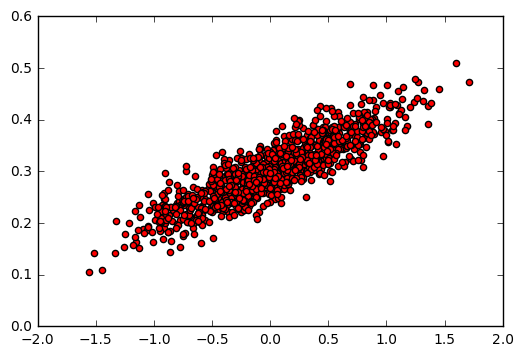

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#随机生成1000个点 围绕在y=0.1X+0.3 的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1*0.1+0.3+np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])
    
# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [10]:
# 生成1维的w矩阵,取值是[-1,1]之间的随机数   权重值 随机初始化
W = tf.Variable(tf.random_uniform([1],-1.0,1.0,name='w'))  #参数说明  一维 范围是-1.0到1.0
#生成1维的b矩阵 初始值是0    
b = tf.Variable(tf.zeros([1]),name='b') 
# 经过计算得出预估值 y
y = W * x_data + b  #机器学习的套路: 给出一个目标函数 （损失函数） 向着某个方向优化  

#以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y-y_data),name='loss') 
#采用梯度下降法来优化参数  采用一个优化器
optimizer = tf.train.GradientDescentOptimizer(0.5) #0.5是步长 或者 学习率
#训练的过程就是最小化这个误差值
train = optimizer.minimize(loss,name='train')

sess = tf.Session() #定义一个参数域

init = tf.global_variables_initializer()
sess.run(init) #初始化参数

#初始化的w和b是多少
print("w=",sess.run(W),"b=",sess.run(b),"loss=",sess.run(loss))
#执行20次训练
for step in range(20):
    sess.run(train)
    #输出训练好的w和b
    print("w=",sess.run(W),"b=",sess.run(b),"loss=",sess.run(loss))


w= [0.93110514] b= [0.] loss= 0.28838173
w= [0.68950707] b= [0.2887275] loss= 0.10342651
w= [0.5151373] b= [0.29251862] loss= 0.05161251
w= [0.39249894] b= [0.2952548] loss= 0.02598135
w= [0.30624342] b= [0.2971792] loss= 0.013302224
w= [0.2455771] b= [0.2985327] loss= 0.007030155
w= [0.20290852] b= [0.29948467] loss= 0.003927511
w= [0.17289832] b= [0.3001542] loss= 0.0023927058
w= [0.15179119] b= [0.30062512] loss= 0.0016334746
w= [0.13694584] b= [0.30095634] loss= 0.0012579003
w= [0.12650463] b= [0.30118927] loss= 0.0010721125
w= [0.11916099] b= [0.30135313] loss= 0.0009802077
w= [0.11399598] b= [0.30146837] loss= 0.0009347446
w= [0.11036325] b= [0.3015494] loss= 0.000912255
w= [0.10780824] b= [0.30160642] loss= 0.00090112997
w= [0.10601122] b= [0.3016465] loss= 0.00089562667
w= [0.10474731] b= [0.3016747] loss= 0.0008929043
w= [0.10385837] b= [0.30169454] loss= 0.0008915577
w= [0.10323314] b= [0.3017085] loss= 0.0008908914
w= [0.1027934] b= [0.3017183] loss= 0.0008905619
w= [0.10248

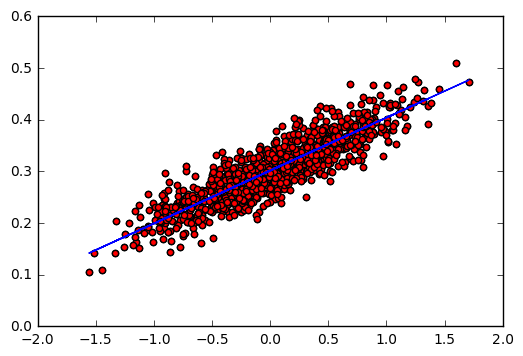

In [12]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()